# Daily Challenge: Analysis of Airplane Crashes and Fatalities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Tasks

1. Data Import and Cleaning:

    - Import the dataset using Pandas.
    - Clean and preprocess the data, addressing missing values and categorizing data as needed.
    - Convert dates and other relevant fields to appropriate formats.


In [2]:
df = pd.read_csv(r'Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')
df

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11/21/2022,10:15,"Medellín, Colombia",AeroPaca SAS,NaN,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,6.0,2.0,8.0,6.0,2.0,0.0,The plane was chartered to carry a team of six...
4994,1/15/2023,10:50,"Pokhara, Nepal",Yeti Airlines,YT691,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,68.0,4.0,72.0,68.0,4.0,0.0,"Before approach, the pilot requested a change ..."
4995,9/16/2023,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,12.0,2.0,14.0,12.0,2.0,0.0,The air taxi crashed in heavy rain while attem...
4996,10/29/2023,6:30,"Rio Branco, Brazil",ART Taxi Aero,NaN,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The air taxi crashed into a heavy wooded area ...


First, I'm dropping columns with lots of NaNs.

In [3]:
df = df.dropna(axis=1, thresh = 3*len(df)/4) 

Now I'm going to fill NaN spaces with mean values, for only the numerical columns.

In [4]:
a = df.select_dtypes('number')
df[a.columns] = a.fillna(a.mean())

C:\Users\julie\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


The rest I'm just setting to 0.

In [5]:
df = df.fillna(0)

In [6]:
df["Date"]

0        9/17/1908
1         9/7/1909
2        7/12/1912
3         8/6/1913
4         9/9/1913
           ...    
4993    11/21/2022
4994     1/15/2023
4995     9/16/2023
4996    10/29/2023
4997     11/1/2023
Name: Date, Length: 4998, dtype: object

I can also change the "Date" column to numpy datetime:

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

2. Exploratory Data Analysis:

    - Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.
    - Analyze the frequency of crashes over time to identify any trends.


In [8]:
df["Survival Rates"] = df["Aboard"] - df["Fatalities"]

In [9]:
df.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Survival Rates
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128,8.822437
std,45.452702,43.088993,3.404165,35.033663,33.309034,3.090585,55.306371,30.605604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000
50%,16.000000,13.000000,4.000000,11.000000,9.000000,3.000000,0.000000,0.000000
75%,35.000000,29.000000,5.000000,25.000000,20.000000,5.000000,0.000000,4.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000,516.000000


What this table can tell us is that, on average over the 4998 reported cases,
- There were 31 +/- 45 members aboard.
- 22 +/- 35 people perished in the accidents, and 8 +/- 31 people survived.

The standard deviations are huge so this information is not very telling.

There's also one report of 583 people dying in one plane crash. That's the case with most fatalities in history.

Now I want to analyze the frequency of crashes over time. I'll create a "Year" column: 

In [10]:
df['Year'] = pd.to_datetime(df['Date']).dt.to_period('Y')

Now I can count the number of airplane crashes by year:

In [11]:
date_distribution = (df["Year"].value_counts()).sort_index(ascending=True)

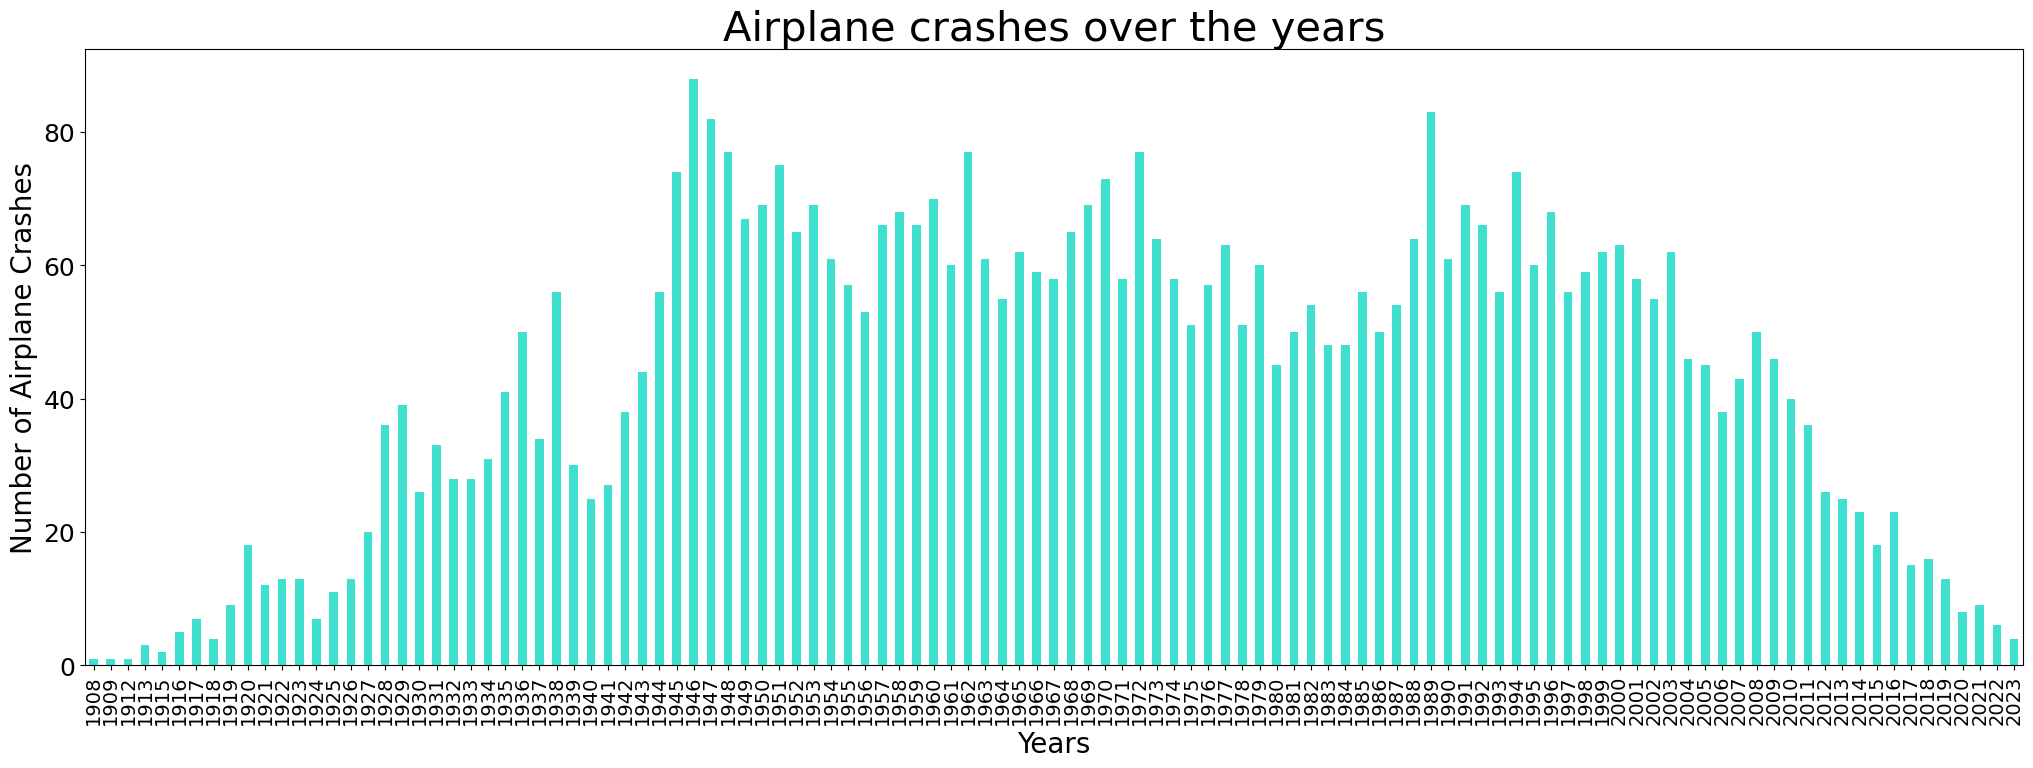

In [12]:
date_distribution.plot(kind='bar', figsize=(25,8), color = 'turquoise')
plt.title('Airplane crashes over the years', fontsize = 30)
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Number of Airplane Crashes', fontsize = 20)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=18)
plt.show()

From 1908 until 1949 approximately, the number of airplane crashes seemed to be increasing, probably due to the increasing amount of available flights. 
Since 1989, the number of airplane crashes has been declining pretty much monotonically, thankfully.

3. Statistical Analysis:

    - Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.
    - Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).


The first point is to apply the functions `stats.tmean()`, `np.median()`, `stats.tvar()` and `stats.tstd()` to gather the same information obtained before, so I will skip it.

In [14]:
df['year'] = df['Date'].dt.year
df['Decade'] = (df['year'] // 10) * 10
decade_1980s = df[df['Decade'] == 1980]['Fatalities']
decade_2000s = df[df['Decade'] == 2000]['Fatalities']


t_stat, p_value = stats.ttest_ind(decade_1980s, decade_2000s)

print(np.abs(t_stat), p_value)

3.0635157641167265 0.002242973423060483


t_stat is higher than 2, and p-value is lower than 0.05, therefore we can conclude that the average number of fatalities in these two decades are different.

4. Visualization:

    - Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.
    - Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.


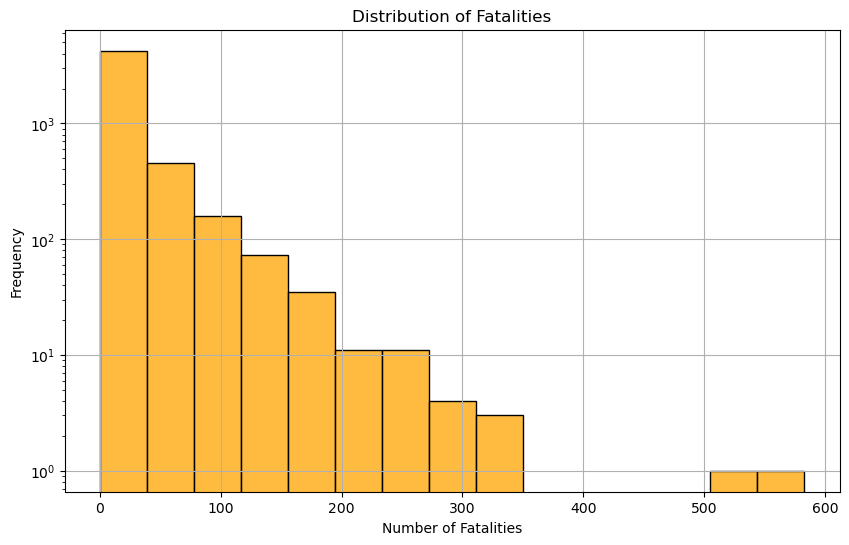

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fatalities'], color='orange', bins=15)
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid()
plt.show()

In most cases there were little to no fatalities on the airplane crashes.

I can do the regions plot, but it would take me a while since the "Location" column isn't clearly diveded even by country. 